This file is used to statistic the static information of the dataset.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### static number of images in training and testing sets

In [6]:
def count_img_num(dataset_dir):
    scene_list = os.listdir(dataset_dir)
    num_train = 0
    num_test = 0
    
    for scene in scene_list:
        scene_path = os.path.join(dataset_dir, scene) + '/'
    
        if os.path.isdir(scene_path):
            with open(scene_path + 'TrainSplit.txt', 'r') as f:
                lines = f.readlines()
                train_traj = len(lines)
            with open(scene_path + 'TestSplit.txt', 'r') as f:
                lines = f.readlines()
                test_traj = len(lines)

            for traj in range(1, train_traj + 1):
                traj_path = scene_path + f'traj{traj:03}/'
                if os.path.exists(traj_path):
                    num_train += sum(1 for filename in os.listdir(traj_path) if filename.endswith('.jpg'))/4
                    # print(scene, traj, sum(1 for filename in os.listdir(traj_path) if filename.endswith('.jpg'))/4, sum(1 for filename in os.listdir(traj_path) if filename.endswith('.txt')) - 1)

            for traj in range(train_traj + 1, train_traj + test_traj + 1):
                traj_path = os.path.join(scene_path, f'traj{traj:03}')
                if os.path.exists(traj_path):
                    num_test += sum(1 for filename in os.listdir(traj_path) if filename.endswith('.jpg'))/4
                    # print(scene, traj, sum(1 for filename in os.listdir(traj_path) if filename.endswith('.jpg'))/4, sum(1 for filename in os.listdir(traj_path) if filename.endswith('.txt')) - 1)


    return num_train, num_test

In [10]:
dataset_dir = './fisheye_dataset/'

num_train, num_test = count_img_num(dataset_dir)
print(f'num_train: {num_train}')
print(f'num_test: {num_test}')

num_train: 94023.0
num_test: 26074.0


### static altitude and attitude

In [18]:
def static_height_attitude(dataset_dir):
    scene_list = os.listdir(dataset_dir)
    height_list = []   # 0-10m, 10-20m, ...
    yaw_list = []
    pitch_list = []
    roll_list = []

    for scene in scene_list:
        scene_path = os.path.join(dataset_dir, scene) + '/'

        if os.path.isdir(scene_path):
            with open(scene_path + 'TrainSplit.txt', 'r') as f:
                lines = f.readlines()
                train_traj = len(lines)
            with open(scene_path + 'TestSplit.txt', 'r') as f:
                lines = f.readlines()
                test_traj = len(lines)

            for traj in range(1, train_traj + test_traj + 1):
                traj_path = scene_path + f'traj{traj:03}/'
                if os.path.exists(traj_path):
                    for file_name in os.listdir(traj_path):
                        if not file_name[:5] == "label":
                            continue
                        if file_name.endswith('.txt'):
                            file_path = traj_path + file_name
                            with open(file_path, 'r') as f:
                                lines = f.readlines()
                                
                                values = lines[0].strip().split()
                            
                                height = -float(values[3])
                                yaw = float(values[9])/np.pi*180
                                pitch = float(values[8])/np.pi*180
                                roll = float(values[7])/np.pi*180

                                height_list.append(height)
                                yaw_list.append(yaw)
                                pitch_list.append(pitch)
                                roll_list.append(roll)

    return height_list, yaw_list, pitch_list, roll_list


height_list, yaw_list, pitch_list, roll_list = static_height_attitude(dataset_dir)

[29678, 54791, 22005, 13685]


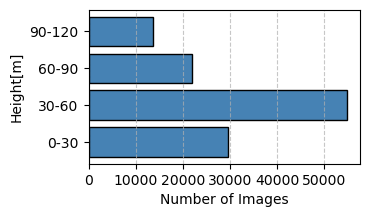

In [44]:
height_x_label = ['0-30', '30-60', '60-90', '90-120']
height_static = [0]*4  # 0-20m, 20-40m, ...
for height in height_list:
    ind = int(height//30)
    height_static[ind] += 1

print(height_static)

plt.figure(figsize=(3.5, 2))
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 1,
})

# plot height
plt.barh(height_x_label, height_static, color='steelblue', edgecolor='black')
plt.ylabel('Height[m]', fontsize=10)
plt.xlabel('Number of Images', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

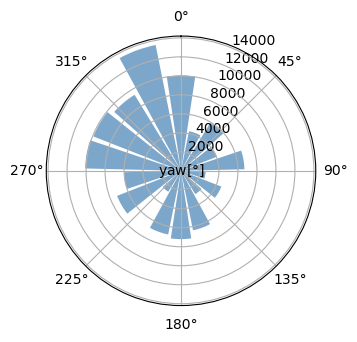

In [46]:
yaw_static = [0]*18
for yaw in yaw_list:
    ind = int(yaw//20)
    yaw_static[ind] += 1
# plot yaw
plt.figure(figsize=(3.5, 3.5))
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 1,
})
angles = np.linspace(0, 2 * np.pi, len(yaw_static), endpoint=False).tolist()

ax = plt.subplot(projection='polar')
ax.set_theta_offset(np.pi / 2)  
ax.set_theta_direction(-1)
ax.bar(angles, yaw_static, color='steelblue', alpha=0.7, width=0.3)
ax.text(0.5, 0.5, 'yaw[$\degree$]', ha='center', va='center', fontsize=10)
plt.show()



<Figure size 350x350 with 0 Axes>

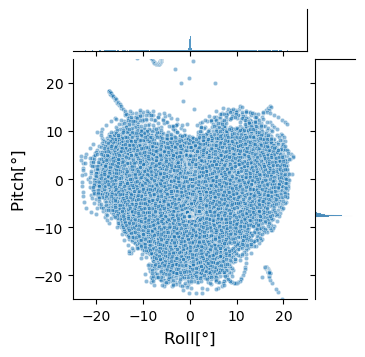

In [ ]:
# plot pitch and roll
roll = np.array(roll_list)
pitch = np.array(pitch_list)
plt.figure(figsize=(3.5, 3.5))
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 1.5,
})

g = sns.JointGrid(data=None, x=roll, y=pitch, height=3.5)
g.plot(sns.scatterplot, sns.histplot)

g.ax_joint.collections[0].set_sizes([10])  
g.ax_joint.collections[0].set_alpha(0.5)  
g.ax_marg_x.hist(roll, bins=5, color='blue', alpha=0.5, orientation='vertical', density=True)
g.ax_marg_y.hist(pitch, bins=5, color='blue', alpha=0.5, orientation='horizontal', density=True)

for count, x in zip(roll, 5):
    g.ax_marg_x.text(x, count, f"{count:.2f}", ha='center', va='bottom', fontsize=8)

# 添加 x 轴值到 marg_y
for count, y in zip(pitch, 5):
    g.ax_marg_y.text(count, y, f"{count:.2f}", ha='right', va='center', fontsize=8)


g.ax_joint.set_xlabel('Roll[$\degree$]', fontsize=12)
g.ax_joint.set_ylabel('Pitch[$\degree$]', fontsize=12)
g.ax_joint.set_xlim(-25, 25)
g.ax_joint.set_ylim(-25, 25)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_y.spines['top'].set_visible(True)
plt.show()